# Projeto - Análise de reconhecimento de doenças cardíacas

+ Problema de negócio
+ Abordagem analítica 
+ Obtenção dos dados e EDA - Análise exploratória dos dados
+ Pré-processamento dos dados
+ modelagem e avaliação do modelo
---

## Problema de negócio
Descobrir quais pessoas tem mais chance de desenvolver uma doença cardíaca.

---

## Abordagem análitica
Este é um problema que usaremos machine learning para determinar quem pode desenvolver ou não uma doença cardíaca, sendo então um problema de classificação binaria. Fazer uma previsão que indica que uma pessoa terá ou tem uma doença cardíaca significa um tratamento mais robusto na qual a pessoa terá oportunidade de ter um tratamento mais específico e especializado. neste contexto usarei a métrica Precision para avaliar o modelo.

## Obtenção dos dados e EDA - Análise exploratória dos dados

In [1]:
# importando as bibliotecas
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# carregando a dados
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# quantidade de linhas e colunas
df.shape

(303, 14)

In [4]:
# checando valores nulos
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# detalhes sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# resumo estatistico dos dados
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


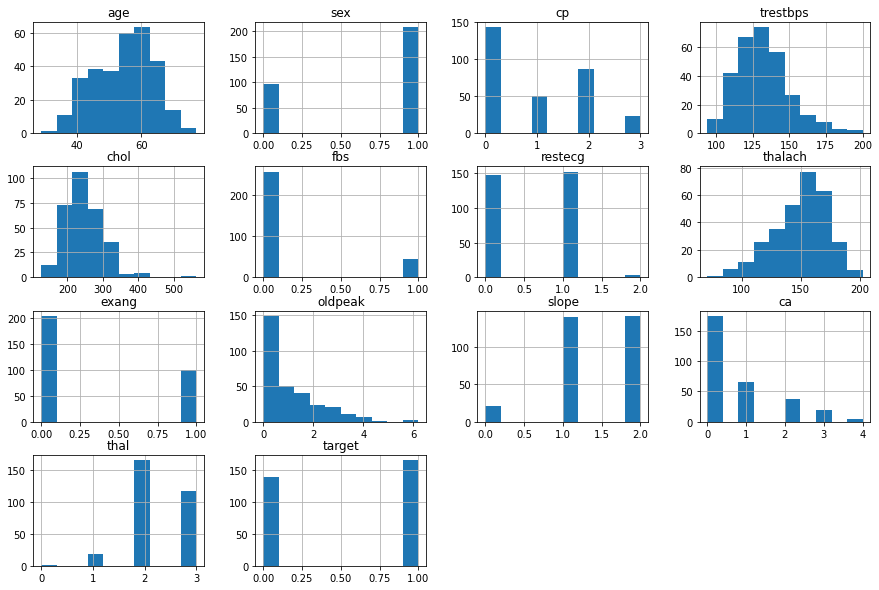

In [7]:
# histograma do dataframe
df.hist(figsize= (15 ,10))
plt.show()

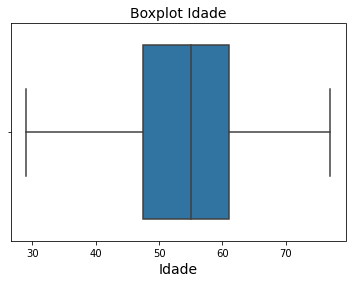

<Figure size 720x576 with 0 Axes>

In [8]:
# boxplot de idade
sns.boxplot(df['age'])
plt.title('Boxplot Idade', fontdict={'size':14})
plt.xlabel('Idade', fontdict={'size': 14})
plt.figure(figsize = (10,8))
plt.show()

In [9]:
# selecionando alguns atributos categóricos
df_categorico = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']]

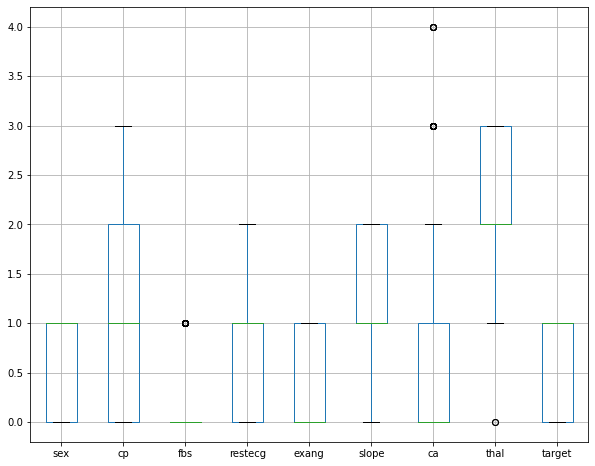

In [10]:
# checando outlier
df_categorico.boxplot(figsize=(10,8))
plt.show()

In [11]:
# observando como esta distribuido os dados na variável alvo
num_verdadeiro = len(df.loc[df['target'] == 1])
num_falsos = len(df.loc[df['target'] == 0])
print('Números de verdadeiros: {:.4f}%'.format(num_verdadeiro / (num_verdadeiro + num_falsos) * 100))
print('Números de falsos: {:.4f}%'.format(num_falsos / (num_falsos + num_verdadeiro) * 100))

Números de verdadeiros: 54.4554%
Números de falsos: 45.5446%


Observa-se que os dados da variável dependente esta bem distribuido entre as classes que queremos prever

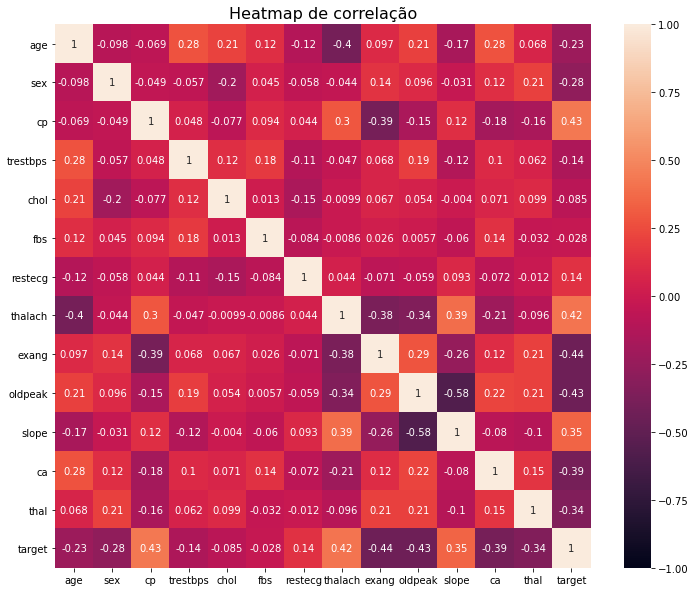

In [12]:
# heatmap de correlação, onde podemos visualizar a correlação entre as variáveis
plt.figure(figsize = (12,10))
heatmap = sns.heatmap(df.corr(), vmin= -1, vmax= 1, annot=True)
heatmap.set_title('Heatmap de correlação', fontdict={'size': 16})
plt.show()

In [13]:
# filtro para verificar se existe correlação maior igual a 0.5 e menor que 0.5 
# observa-se que não existe feature com correlação maior que 0.5
# mas existe features com correlação entre menor que 0.5 e maior igual a 0.3
df_corr_1 = df.corr()['target'][:-1]
features_forte_corr = df_corr_1[abs(df_corr_1) >= 0.5].sort_values(ascending=False)
print('Números de features com correlação forte/alta: {} \nBoa correlação com o alvo: \n{}'.format(len(features_forte_corr), features_forte_corr))
print('---' * 15)
features_fraca_corr = df_corr_1[(abs(df_corr_1) < 0.5) & (abs(df_corr_1) >= 0.3)].sort_values(ascending=False)
print('Números de features com correlação fraca/baixa: {} \nBaixa correlação com o alvo: \n{}'.format(len(features_fraca_corr), features_fraca_corr))

Números de features com correlação forte/alta: 0 
Boa correlação com o alvo: 
Series([], Name: target, dtype: float64)
---------------------------------------------
Números de features com correlação fraca/baixa: 7 
Baixa correlação com o alvo: 
cp         0.433798
thalach    0.421741
slope      0.345877
thal      -0.344029
ca        -0.391724
oldpeak   -0.430696
exang     -0.436757
Name: target, dtype: float64


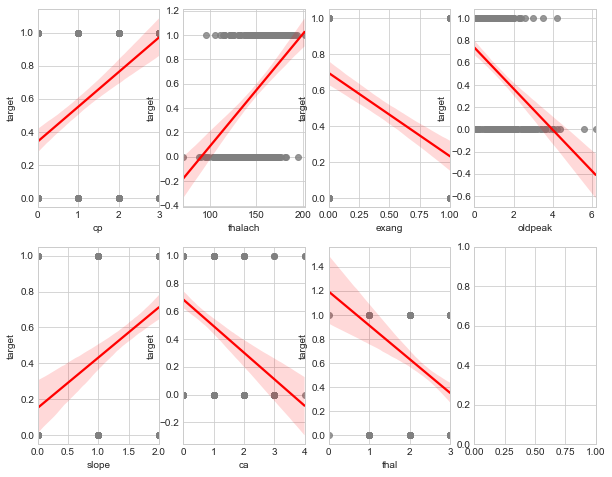

In [17]:
# plotando scatterplot com linha de regressão para observar a linearidade correlacionada com a variável alvo
features_fraca_corr = df_corr_1[(abs(df_corr_1) < 0.5) & (abs(df_corr_1) >= 0.3)].index.tolist()
features_fraca_corr.append('target')

df_corr_features = df.loc[:, features_fraca_corr]


plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(round(len(features_fraca_corr) / 5), 4 , figsize = (10, 8))
for i, ax in enumerate(fig.axes):
    if i < len(features_fraca_corr) -1:
        sns.regplot(x = features_fraca_corr[i], y = 'target', data = df_corr_features,ax=ax ,scatter_kws={'color':'grey'},line_kws={'color':'red'})

A partir do gráfico acima podemos perceber que os dados observados tem uma relação linear com o target 

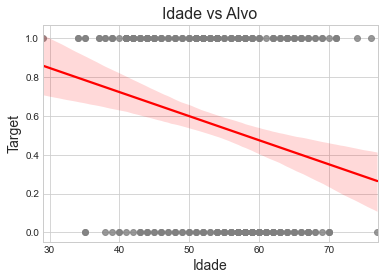

In [18]:
sns.regplot(x = 'age', y = 'target', data= df, scatter_kws={'color':'grey'}, line_kws={'color':'red'})
plt.title('Idade vs Alvo', fontdict={'size': 16})
plt.xlabel('Idade', fontdict={'size': 14})
plt.ylabel('Target', fontdict={'size': 14})
plt.show()

Observando o gráfico acima e a linha de regressão obsesrva-se que a medida que a idade aumenta a pessoa tem menos chance de desenvolver alguma doença do coração. oque normalmente não é verdade, pois estudos indicam que quanto maior a idade mais propensa a doenças cardiovasculares. 
então, o método de análise dessa variável deva ser outra mais adequada, talvez com uma função sigmoid.

## Pré - processamento dos dados

In [19]:
# utilizando a função StandardScaler para padronizar as features removendo a média e escala a variância a uma unidade
from sklearn.preprocessing import StandardScaler

In [20]:
# selecionando os atributos para fazer a previsão
atributos = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
            'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [21]:
# atributo que queremos prever 
atributo_prev = ['target']

In [22]:
# aplicando o StandardScaler
df_standard_scaler = StandardScaler().fit_transform(df[atributos])
df_standard_scaler

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [23]:
# definindo as variáveis preditoras x e a variável alvo y
x = df_standard_scaler
y = df[atributo_prev].values

## Modelagem

In [141]:
# importando bibliotecas que usaremos no processo de modelagem dos dados
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

In [25]:
# separando os dados em conjunto de treino e conjunto de teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size= 0.2, random_state= 1)
print(f'Conjunto de treino: {x_treino.shape} | {y_treino.shape}')
print(f'Conjunto de teste: {x_teste.shape} | {y_teste.shape}')

Conjunto de treino: (242, 13) | (242, 1)
Conjunto de teste: (61, 13) | (61, 1)


## Random Forest

In [26]:
# criando e treinando o modelo RandomForest
modelo_1 = RandomForestClassifier(n_estimators= 200, n_jobs= 1, random_state=10)
modelo_1.fit(x_treino, y_treino.ravel())

RandomForestClassifier(n_estimators=200, n_jobs=1, random_state=10)

In [27]:
# método predict
pred = modelo_1.predict(x_teste)

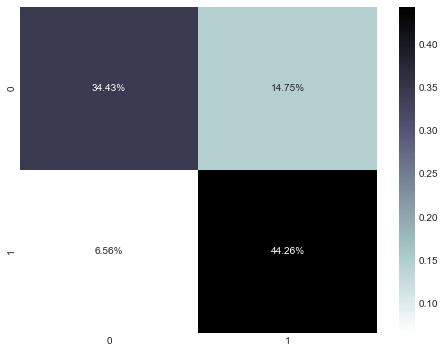

In [28]:
# matriz de confusão
cf_matrix = confusion_matrix(y_teste, pred)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt= '.2%', cmap = 'bone_r',)
plt.show()

In [29]:
# avaliando a performance do modelo
print(f'Precision: {precision_score(y_teste, pred):.4f}')
print(f'F1_Score: {f1_score(y_teste, pred):.4f}')

Precision: 0.7500
F1_Score: 0.8060


In [30]:
# usando cross-validate
cv = KFold(n_splits= 15, random_state = 12, shuffle=True)

modelo_1 = RandomForestClassifier(n_estimators= 200, n_jobs= 1, random_state=10)

score = cross_val_score(modelo_1, x, y.ravel(), scoring='precision', cv = cv)
print(f'Precision: {np.mean(score):.4f} | Std: {np.std(score):.4f}')

Precision: 0.8346 | Std: 0.1043


* modelo_RF = Precision: 0.8346 | Std: 0.1043

## Logistic Regression

In [36]:
# criando e treinando o modelo LogisticRegressor
modelo_2 = LogisticRegression(C= 0.8, solver = 'liblinear', random_state= 11)
modelo_2.fit(x_treino, y_treino.ravel())

LogisticRegression(C=0.8, random_state=11, solver='liblinear')

In [37]:
# método predict
pred_2 = modelo_2.predict(x_teste)

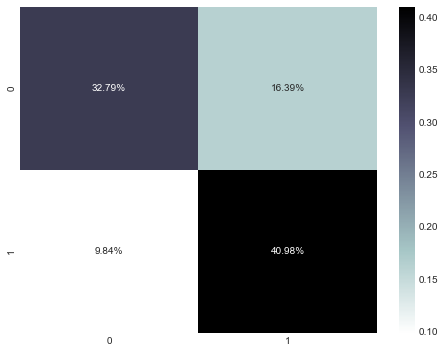

In [38]:
# matriz de confusão
cf_matrix = confusion_matrix(y_teste, pred_2)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt= '.2%', cmap = 'bone_r',)
plt.show()

In [39]:
# avaliação do modelo
print(f'Precision: {precision_score(y_teste, pred_2):.4f}')
print(f'F1_Score: {f1_score(y_teste, pred_2):.4f}')

Precision: 0.7143
F1_Score: 0.7576


In [35]:
# cross-validate 
cv = KFold(n_splits= 15, random_state = 12, shuffle=True)

modelo_2 = LogisticRegression(C= 0.8, solver = 'liblinear', random_state= 11)

score = cross_val_score(modelo_2, x, y.ravel(), scoring='precision', cv = cv)
print(f'Precision: {np.mean(score):.4f} | Std: {np.std(score):.4f}')

Precision: 0.8229 | Std: 0.0934


* Modelo_LogR =  Precision: 0.8229 | Std: 0.0934

## GaussianNB

In [40]:
# instanciando e treinando o modelo GaussianNB
modelo_3 = GaussianNB()
modelo_3.fit(x_treino, y_treino)

GaussianNB()

In [41]:
# método predict
pred_3 = modelo_3.predict(x_teste)

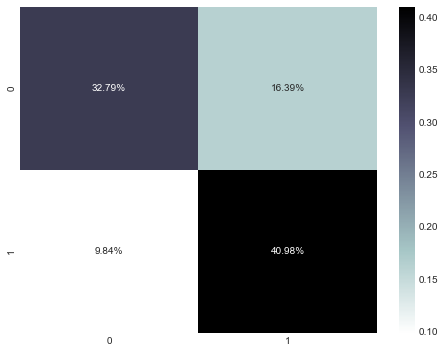

In [42]:
# matriz de confusão
cf_matrix_3 = confusion_matrix(y_teste, pred_3)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt= '.2%', cmap = 'bone_r',)
plt.show()

In [43]:
# avaliando o modelo
print(f'Precision: {precision_score(y_teste, pred_3):.4f}')
print(f'F1_Score: {f1_score(y_teste, pred_3):.4f}')

Precision: 0.7576
F1_Score: 0.7812


In [44]:
# cross-validade 
cv = KFold(n_splits= 15, random_state = 12, shuffle=True)

modelo_3 = GaussianNB()

score = cross_val_score(modelo_3, x, y.ravel(), scoring='precision', cv = cv)
print(f'Precision: {np.mean(score):.4f} | Std: {np.std(score):.4f}')

Precision: 0.8176 | Std: 0.0980


* Modelo_GaussianNB = Precision: 0.8176 | Std: 0.0980

## Adaboosting

In [113]:
cv = KFold(n_splits= 15, random_state = 12, shuffle=True)

modelo_4 = AdaBoostClassifier(learning_rate=0.03, n_estimators= 150, random_state= 13)

score = cross_val_score(modelo_4, x, y.ravel(), scoring='precision', cv = cv)
print(f'Precision: {np.mean(score):.4f} | Std: {np.std(score):.4f}')

Precision: 0.8476 | Std: 0.1057


* Modelo_Adaboost = Precision: 0.8476 | Std: 0.1057

## Retreinar os modelos com os atributos mais bem correlacionados com o Target

In [45]:
x_atributos = ['cp', 'thalach', 'slope', 'thal', 'ca', 'oldpeak', 'exang']

In [46]:
# usando cross-validate com os atributos mais bem relacionados com o Target
cv = KFold(n_splits= 15, random_state = 12, shuffle=True)

modelo_1 = RandomForestClassifier(n_estimators= 200, n_jobs= 1, random_state=10)

score = cross_val_score(modelo_1, df[x_atributos], y.ravel(), scoring='precision', cv = cv)
print(f'Precision: {np.mean(score):.4f} | Std: {np.std(score):.4f}')

Precision: 0.8121 | Std: 0.1043


* Modelo_RF = Precision: 0.8121 | Std: 0.1043

In [47]:
cv = KFold(n_splits= 15, random_state = 12, shuffle=True)

modelo_2 = LogisticRegression(C= 0.8, solver = 'liblinear', random_state= 11)

score = cross_val_score(modelo_2, df[x_atributos], y.ravel(), scoring='precision', cv = cv)
print(f'Precision: {np.mean(score):.4f} | Std: {np.std(score):.4f}')

Precision: 0.8341 | Std: 0.0926


* Modelo_LogR = Precision: Precision: 0.8341 | Std: 0.0926

In [48]:
cv = KFold(n_splits= 15, random_state = 12, shuffle=True)

modelo_3 = GaussianNB()

score = cross_val_score(modelo_3, df[x_atributos], y.ravel(), scoring='precision', cv = cv)
print(f'Precision: {np.mean(score):.4f} | Std: {np.std(score):.4f}')

Precision: 0.8278 | Std: 0.1063


* Modelo_GaussianNB = Precision: 0.8278 | Std: 0.1063

In [140]:
cv = KFold(n_splits= 15, random_state = 12, shuffle=True)

modelo_4 = AdaBoostClassifier(learning_rate=1e-1, n_estimators= 300, random_state= 13)

score = cross_val_score(modelo_4, df[x_atributos], y.ravel(), scoring='precision', cv = cv)
print(f'Precision: {np.mean(score):.4f} | Std: {np.std(score):.4f}')

Precision: 0.8298 | Std: 0.1042


## Resultados

In [142]:
# criando uma lista de dicionario
data = [
    {'Precision': 0.8346, 'Desvio Padrão': 0.1043},
    {'Precision': 0.8341, 'Desvio Padrão': 0.0926},
    {'Precision': 0.8278, 'Desvio Padrão': 0.1063},
    {'Precision': 0.8476, 'Desvio Padrão': 0.1057}
]

In [143]:
# criando indices
indice = ['RandomForest', 'LogisticRegression', 'GaussianNB', 'AdaBoost']

In [144]:
# gerando um dataframe com os resultados de avaliação dos modelos
resultado = pd.DataFrame(data, index = indice)
resultado

,Precision,Desvio Padrão
RandomForest,0.8346,0.1043
LogisticRegression,0.8341,0.0926
GaussianNB,0.8278,0.1063
AdaBoost,0.8476,0.1057


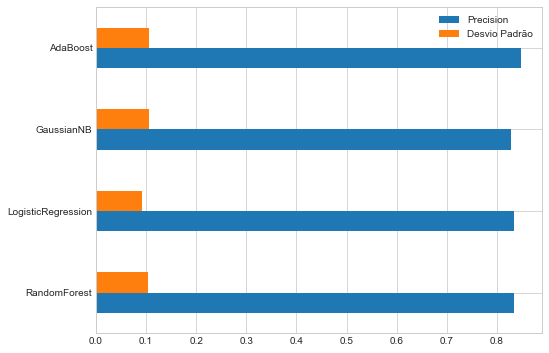

In [147]:
resultado.plot(kind = 'barh', figsize = (8,6))
plt.show()

Os algoritmos propostos tiveram uma precisão média de 0.83%, não tendo nenhuma grande diferença entre eles. e o modelo que saiu melhor foi o Adaboost com uma precisão média de 0.8476%. a metrica usada neste problema, a *Precision*, tem a finalidade de indicar qual a capacidade do classificador em rotular como positiva uma amostra que realmente é positiva, bem como não classificar um rotulo positivo em negativo. 


- Fórmula Precision Score:

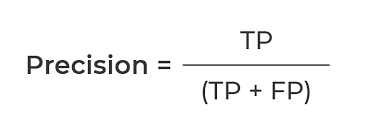